# Lab 6 - Hidden Markov Model

### (0) Import necessary packages

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import hmmlearn.hmm as HMM
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### (1) Load the Heart Rate data and plot the observations.

You'll need to figure out an time axis vector for the data (it was recorded starting from midnight at even intervals over 24 hours).

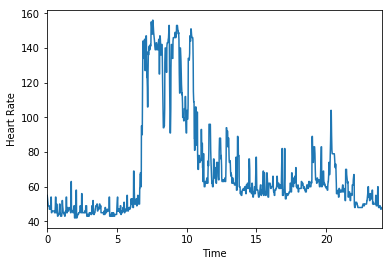

In [2]:
# Load data
data = pd.read_csv("lab6_HR.csv")
t = np.linspace(0, 24, data.shape[0])

# Plot data
plt.plot(t, data)
plt.xlim([0, 24])
plt.xlabel('Time')
plt.ylabel('Heart Rate');

### (2) Do you see regions where there might be differences in behavior?

How do you justify your choice?

There are definitely regions where differences in behavior can be seen. Just from visual inspection, there are three potentially distinct regions. The first region occurs before 6:30 where the heart rate and variance of heart rate are both low. The second region occurs between 6:30 and 11:00, where the heart rate and variance of heart rate are both high. Finally, the third region occurs after 11:00 where the heart rate is relatively low but variance of heart rate is high.

### (3) Based on when you might expect someone would be asleep, plot the histogram of resting heart rate values.

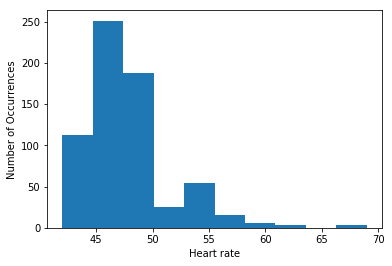

In [3]:
# Resting heart rate
sleep_data = np.append(data[t<6.5], (data[t>22.5]))

# Plot
plt.hist(sleep_data);
plt.xlabel('Heart rate')
plt.ylabel('Number of Occurrences');

The patient is expected to be asleep from 22:30 to 6:30.

### (4) One way to deal with noisy data is to use a moving average. Plot the moving average of the data for two different windows. How does this help visualize the data? What is lost using this approach?

In [4]:
def plotMovingAverage(windowSize, data, t):
    '''Plots the moving average of a dataset with a window size of windowSize'''
    data = pd.DataFrame(data)
    movingAverage = data.rolling(window=windowSize, center=True).mean()
    plt.plot(t, data, alpha=0.6)
    plt.plot(t, movingAverage)
    plt.xlabel('Time')
    plt.ylabel('Heart Rate')
    plt.legend(['raw data', 'moving average'])
    return movingAverage.dropna()

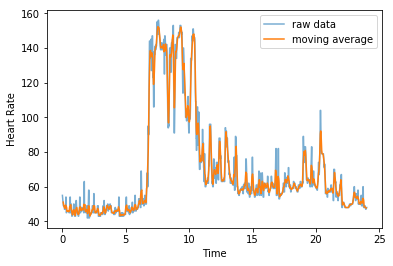

In [5]:
# Moving average with window size = 10
movAvg1 = plotMovingAverage(10, data, t)

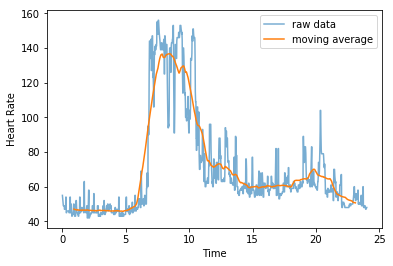

In [6]:
# Moving average with window size = 150
movAvg2 = plotMovingAverage(150, data, t)

The moving average helps "smooth" the visualization and reduces the noise and random fluctuations in the data. However, you may lose some high frequency fluctuations that may be relevant and important.

### (5) We're going to fit an HMM model to this data with three underlying states. This involves three sets of parameters about the model—describe each briefly.

The 3 parameters are initial probabilities, transition probabilities, and emission. Initial probabilities refer to the set of probabilities that the Markov chain begins in a certain state. Transition probabilities refer to the set of probabilities that determine the next state after transition. Emission refers to the set of probabilities that determine the outcome of a state.

### (6) Fit an HMM model with Gaussian emissions to the data. Use any transformations as necessary.

Overlay the raw measurements and HMM state over time.

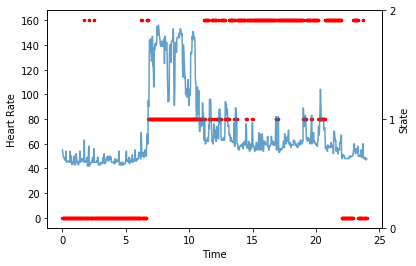

In [7]:
# Create model
np.random.seed(1)
hmm = HMM.GaussianHMM

# Fit the data
model = hmm(n_components = 3, n_iter=200).fit(data)

# Predict
hiddenStates = model.predict(data)

# Plot
fig, ax = plt.subplots()
plt.scatter(t, hiddenStates*80, s=5, c='r')
plt.plot(t, data, alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Heart Rate')
ax2 = ax.twinx()
ax2.set_ylabel('State')
ax2.set_ylim([0,2])
ax2.set_yticks([0,1,2]);

### (7) From the HMM model determine, with a confidence interval, when the patient woke up in the morning.

Hint: `model.predict_proba(X)` can give you the probability of being in each state at each time point.

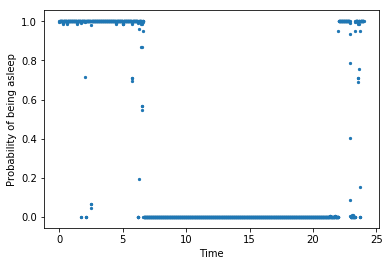

In [8]:
# Plot probability of being asleep hidden state
pred = model.predict_proba(data)
plt.scatter(t, pred[:,0], s=5)
plt.xlabel('Time')
plt.ylabel('Probability of being asleep');

From the figure above, it can be visually seen that the patient most likely slept between 6:10am and 6:40am.

### (8) Say you know there was no strenuous activity during the day—how might you change the model to fit reality better?

Make this change and show how the results change in a plot.

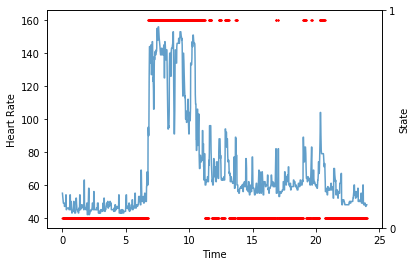

In [9]:
# Fit the data
np.random.seed(1)
model2 = hmm(n_components = 2, n_iter=200).fit(data)

# Predict
hiddenStates = model2.predict(data)

# Plot
fig, ax = plt.subplots()
plt.scatter(t, hiddenStates*120+40, s=1, c='r')
plt.plot(t, data, alpha=0.7)
plt.ylabel('Heart Rate')
plt.xlabel('Time')
ax2 = ax.twinx()
ax2.set_ylabel('State')
ax2.set_ylim([0,1])
ax2.set_yticks([0,1]);

If there was no strenuous activity, then we can change the n_components attribute of the HMM model to 2 since there are only 2 states: asleep and awake. The graph above displays the results. However, the asleep state is present for more than appropriate. Therefore, it is more likely that the patient engaged in at least one strenuous activity during the day. The model would be better if 3 states were fitted.

### (9) Describe one form of other information you could use from a smart watch to make a more accurate determination of the user's state.

How would you use that in your model?

A smart watch can also measure the amount of movement performed by the user. Using an accelerometer, the smart watch can distinguish between moments of high (strenuous activities) and low (asleep) activity.